In [4]:
import pandas as pd
df = pd.read_csv('clean.txt')

def quickpeek(df):
    print(df.shape)
    print(f"{df['player'].nunique()} QBs")
    display(df.head())

quickpeek(df)

(8723, 10)
136 QBs


,player,season,quint,home,cmp%,attempts,ny/a,carries,ypc,td:to
0,Geno Smith,2013,2,1,0.400000,10,1.909091,1,2.000000,-1
1,Ryan Tannehill,2013,2,0,0.651163,43,7.454545,3,7.333333,1
2,Brandon Weeden,2013,2,1,0.600000,40,7.953488,2,2.500000,-1
3,Joe Flacco,2013,2,1,0.685714,35,6.405405,4,1.750000,0
4,Matt Flynn,2013,2,0,0.500000,20,3.777778,2,2.000000,-3


In [7]:
stats = ['cmp%', 'attempts', 'ny/a', 'carries', 'ypc', 'td:to']
years = df['season'].unique()
avgs = {}

for col in stats:
    avgs[col] = {}
    for yr in years:
        avgs[col][yr] = df[df['season'] == yr][col].mean()

df_avg = pd.DataFrame(avgs)
df_avg.T.head()

,2013,2009,2019,2007,2018,2017,2006,2010,2014,2004,2005,2011,2008,2015,2012,2016
cmp%,0.608388,0.599030,0.652246,0.605268,0.644026,0.615582,0.595728,0.606915,0.626195,0.595272,0.594353,0.596938,0.608938,0.629257,0.609454,0.625906
attempts,32.331532,28.153971,31.900000,28.288851,31.873188,31.785847,28.719723,30.101549,31.440351,29.467290,28.404635,30.793286,29.042955,32.916817,31.194872,32.720930
ny/a,6.278563,6.089843,6.611047,5.961980,6.360990,6.181001,5.946936,6.123393,6.428000,6.199756,6.267617,6.338990,6.299001,6.445247,6.329092,6.395980
carries,2.924324,2.079417,3.015000,2.057432,3.195652,2.934823,2.449827,2.438898,2.891228,2.515888,2.317291,2.719081,2.209622,2.877034,2.735043,2.692308
ypc,3.404261,2.630019,2.695718,2.368295,3.562285,3.407773,2.546219,3.009899,3.160293,2.893510,2.727130,2.813076,2.495860,3.201846,3.129113,3.051153


In [13]:
# function for plotting each stat's league average,
# from 2004-2019 (excluding the postseason, because
# then some QBs would be unfairly overrepresented)

# include a line of best fit, to clearly demonstrate
# the overall trend in each graph

import matplotlib.pyplot as plt
import numpy as np
yrs = sorted(years)

def chart_yearly_change(df, col, title, eqx, eqy):
    xlbls = yrs
    xs = list(range(len(xlbls)))
    ys = []
    for yr in xlbls:
        data = df[(df['season'] == yr) & (df['quint'] < 4)]
        ys.append(data[col].mean())
    bf = np.polyfit(xs, ys, 1)
    plt.plot(xs, ys)
    plt.plot(xs, np.poly1d(bf)(xs), dashes=(3,2))
    plt.title(title, fontweight='bold')
    plt.xticks(xs[::2], xlbls[::2])
    plt.text(eqx, eqy, f'y ≈ {bf[0]:.4f}x + {bf[1]:.2f}', color='C2')
    plt.show()

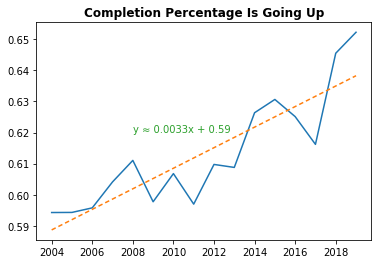

In [14]:
chart_yearly_change(df, 'cmp%', 'Completion Percentage Is Going Up', 4, 0.62)

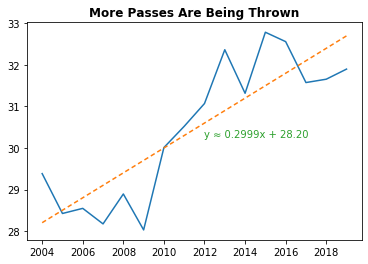

In [15]:
chart_yearly_change(df, 'attempts', 'More Passes Are Being Thrown', 8, 30.25)

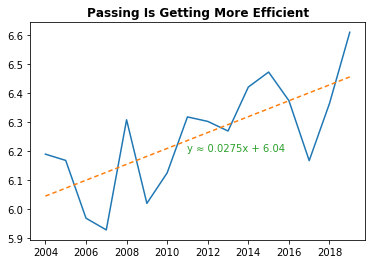

In [16]:
chart_yearly_change(df, 'ny/a', 'Passing Is Getting More Efficient', 7, 6.2)

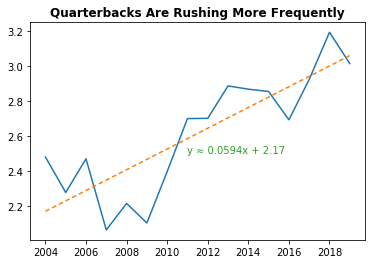

In [18]:
chart_yearly_change(df, 'carries', 'Quarterbacks Are Rushing More Frequently', 7, 2.5)

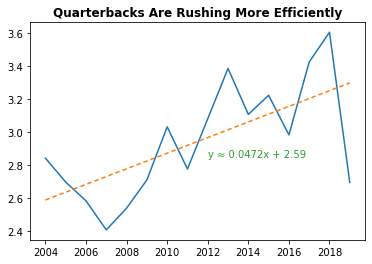

In [19]:
chart_yearly_change(df, 'ypc', 'Quarterbacks Are Rushing More Efficiently', 8, 2.85)

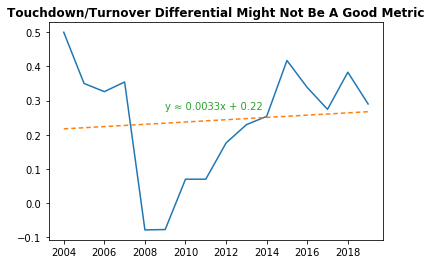

In [20]:
chart_yearly_change(df, 'td:to', 'Touchdown/Turnover Differential Might Not Be A Good Metric', 5, 0.275)

Based on the above graphs, I conclude that I must adjust stats by the league average in that year, to account for such changes